# Tree Traversal Methods

## Lesson Overview

In order to properly run certain algorithms over a tree, you will need to utilize some method or strategy to ensure that you execute code over every node in the tree. To do so, you will often use a **tree traversal** algorithm.

> A **tree traversal** is an algorithm that steps through every node in a tree in some order.

Tree traversal is equivalent to graph search methods (such as depth-first or breadth-first), but specialized for a tree's hierarchical structure. The three most common tree traveral methods are specialized forms of depth-first search, but differ in how they process each node. 

> A **subtree** is a section of a tree defined by a non-root node and its descendants.

Traversal methods primarily use a "left subtree" and a "right subtree", which typically assumes a node has two children. For nodes with more than two children, we choose the children to be in the "left subtree" and the "right subtree" according to some schema (usually splitting them as evenly as possible).

*   A **pre-order** traversal looks at or acts on the current node, then the node's left subtree, then the node's right subtree.
*   A **post-order** traversal looks at or acts on the node's left subtree, then the node's right subtree, then the current node.
*   An **in-order** traversal looks at or acts on the node's left subtree, then the current node, then the node's right subtree.

### Traversal example

All three of these tree traversal methods are done recursively, and once we can no longer act on a left or right subtree (namely for a node that has no such children), we backtrack. Different traversal methods can produce very different orderings of the nodes.

Take this tree, for example:

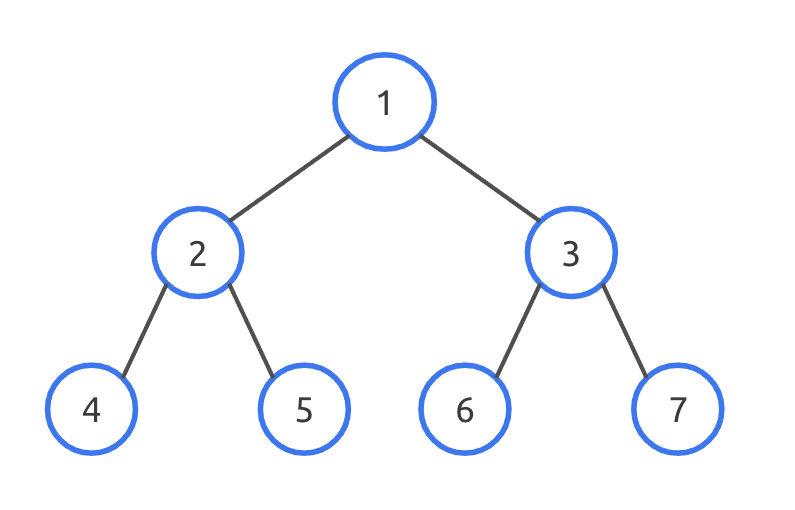

**Pre-order traversal**

We're doing a depth-first traversal of the tree and backtracking back to 2 once we see that 4 has no children. After we've looked at 5, 1 has no more children in its left subtree, so we look at 3, then 6, then backtrack and look at 7. This produces the following order:

$1, 2, 4, 5, 3, 6, 7$

**Post-order traversal**

We largely do the same traversal as a pre-order traversal, but we always look at the current node *last*. This means that we would look at 4 and 5 before 2 and 6 and 7 before 3 and every other node in the tree before 1. This gives us the following output:

$4, 5, 2, 6, 7, 3, 1$

**In-order traversal**

In-order traversal is a bit trickier than the other traversal methods, since rather than processing the current node first or last, you process it between the left and right subtrees. This gives the effect of moving from left to right in a tree (hence the "in-order" name for the traversal). So you'd go to 4, first, like a post-order traversal, but before looking at 5 you would see 2. After 4, 2, 5, you'd look at the root before moving on to the root's right subtree. This eventually produces the ordering:

$4, 2, 5, 1, 6, 3, 7$

To recap, the outcomes of these traversal algorithms are distinct due to the timing of when we process the current node instead of the left and right subtrees:

*   Pre-order: $1, 2, 4, 5, 3, 6, 7$
*   In-order: $4, 5, 2, 6, 7, 3, 1$
*   Post-order: $4, 2, 5, 1, 6, 3, 7$

### Trees in code

For this lesson, we'll use the following `Tree` class.

In [ ]:
#persistent
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    self.children = []

  def add_child(self, node):
    # If the node is not already present in our children, we add it.
    if node not in self.children:
      self.children.append(node)
      # We also set the node's parent to be this node.
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

## Question 1

If you were to perform a pre-order traversal of the following tree, which of the following sequences may appear in your output?

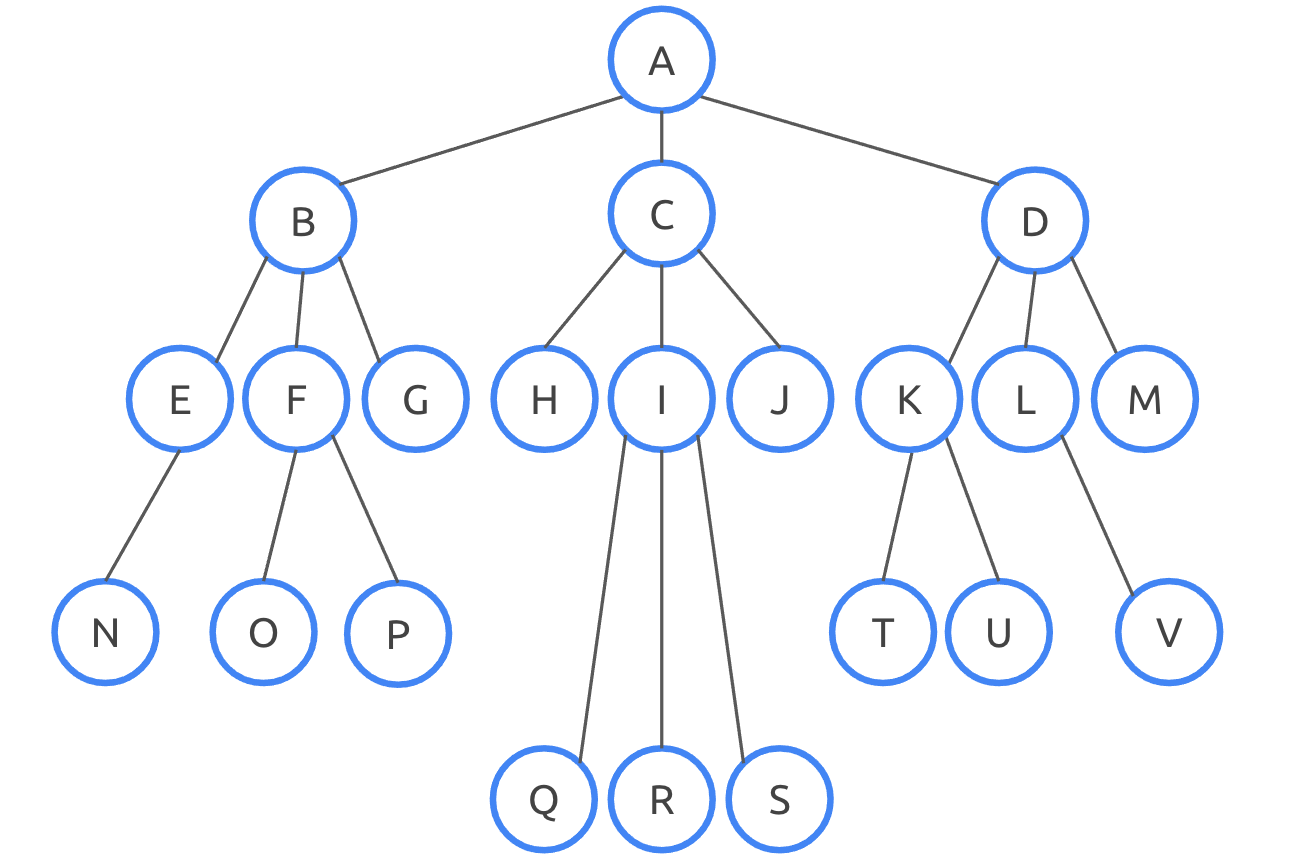

**a)** $ABCD$

**b)** $CHIQ$

**c)** $KTLU$

**d)** $SJDK$

### Solution

The correct answers are **b)** and **d)**.

**a)** Remember to add the node to your output first, and then check the node's left and right subtrees.

**c)** $U$ is still in one of $K$'s subtrees, so it should be printed before $L$.

## Question 2

Recall that a pre-order traversal processes the node, then the node's left subtree, and finally the node's right subtree. It does this recursively until the entire tree is processed.

Add a `get_nodes_preorder` method to the `Tree` class that returns a list of the elements that would be outputted in a pre-order traversal. If any nodes have more than two children, treat `self.children[:n_children//2]` as the left subtree and `self.children[n_children//2:]` as the right subtree, where `n_children = len(self.children)`.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_preorder(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

It can be tricky to get the recursion started, but if you get that you still need to make sure that you traverse correctly. For preorder traversal, add the node to your `node_list` then recursively call your helper function on the left and right subtrees. This does mean that you don't need to worry about the distinction between "left subtree" and "right subtree" if you process the children in order.

If you're getting stuck on the recursion setup, try using this as a guide.

```python
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_preorder(self):
    node_list = []
    self._preorder_helper(self.root, node_list)
    return node_list

  def _preorder_helper(self, current_node, node_list):
    # Write your traversal and recursion here.
```

For help with the recursion, structure your code like so:

```python
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_preorder(self):
    node_list = []
    self._preorder_helper(self.root, node_list)
    return node_list

  def _preorder_helper(self, current_node, node_list):
    # First, add the current node to your node list.

    # Iterate through the node's children; for each one, repeat _preorder_helper
    # on that child (passing it to _preorder_helper). This will recursively
    # process each child's children (and so on).

    # Don't return node_list! It's passed by reference.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node(1))

root = tree.root

root.add_child(Node(2))
root.add_child(Node(3))
root.add_child(Node(4))

root.children[0].add_child(Node(5))
root.children[0].add_child(Node(6))

root.children[1].add_child(Node(7))

root.children[2].add_child(Node(8))
root.children[2].add_child(Node(9))
root.children[2].add_child(Node(10))

preorder_nodes = tree.get_nodes_preorder()
print([n.name for n in preorder_nodes])
# Should print: [1, 2, 5, 6, 3, 7, 4, 8, 9, 10]

### Solution

Remember that pre-order adds `current_node` to `node_list` *before* processing the children. It's an easy mix-up to make.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_preorder(self):
    node_list = []
    self._preorder_helper(self.root, node_list)
    return node_list

  def _preorder_helper(self, current_node, node_list):
    node_list.append(current_node)
    for child in current_node.children:
      self._preorder_helper(child, node_list)

## Question 3

If you were to perform a post-order traversal of the following tree, which of the following sequences may appear in your output?

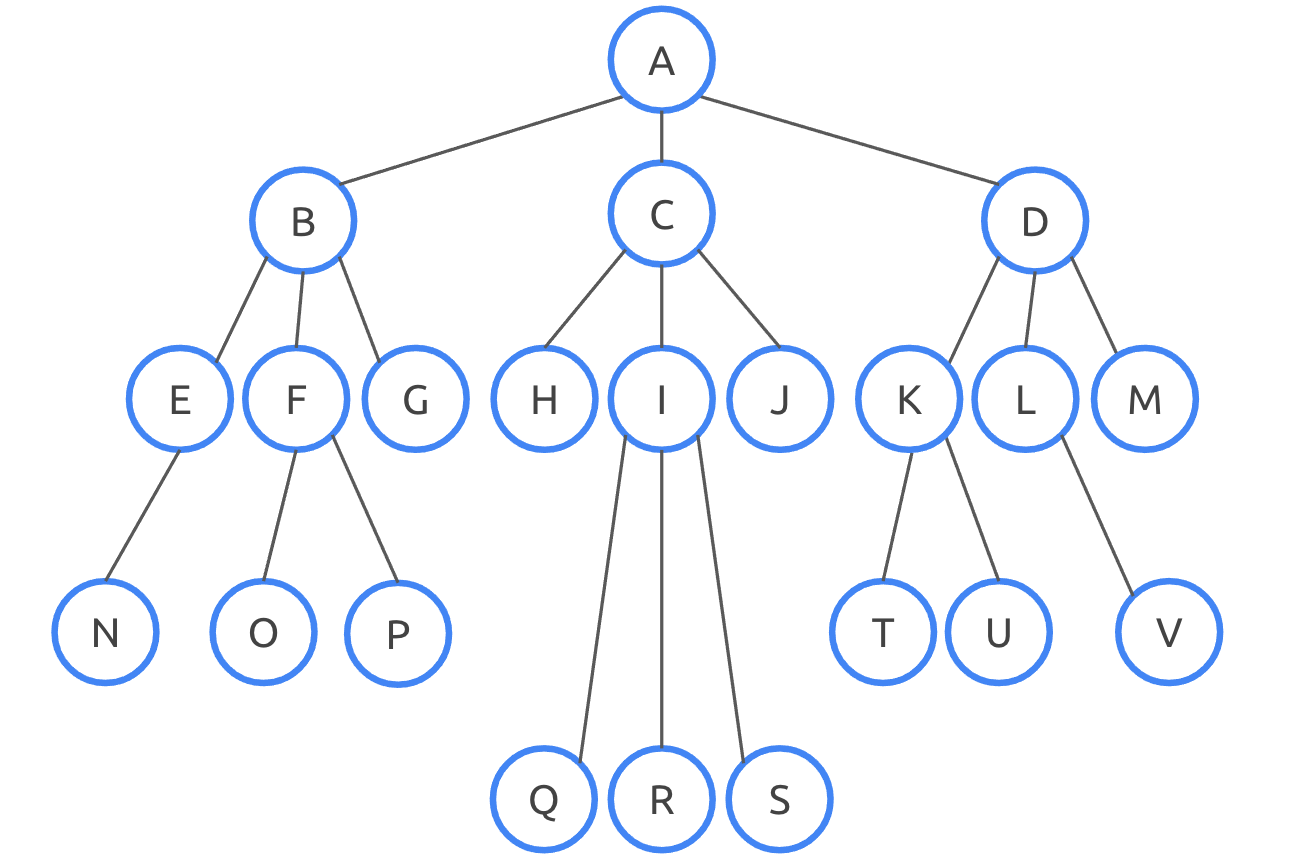

**a)** $CHIQ$

**b)** $NEOP$

**c)** $QRSJ$

**d)** $LMDA$

### Solution

The correct answers are **b)** and **d)**.

**a)** That would appear in a pre-order traversal.

**c)** I should be printed after the elements in its subtree, so it should appear immediately before J.

## Question 4

A post-order traversal on a node the node's left subtree, the node's right subtree, and then the node, last. Like the other traversals, post-order is done recursively until the entire tree is processed.

Add a `get_nodes_postorder` method to the `Tree` class that returns a list of the elements that would be outputted in a post-order traversal. If any nodes have more than two children, treat `self.children[:n_children//2]` as the left subtree and `self.children[n_children//2:]` as the right subtree, where `n_children = len(self.children)`.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_postorder(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

This will work very similarly to pre-order traversal, but you'll add your `current_node` to `node_list` *after* you recurse. Depending on how you've written your pre-order traversal, you may be able to modify it to output a post-order traversal.

Either way, if you're getting stuck on the recursion setup, try using this as a guide.

```python
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_postorder(self):
    node_list = []
    self._postorder_helper(self.root, node_list)
    return node_list

  def _postorder_helper(self, current_node, node_list):
    # Add your traversal and recursion code here.
```

And structure your recursion like this:

```python
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_postorder(self):
    node_list = []
    self._postorder_helper(self.root, node_list)
    return node_list

  def _postorder_helper(self, current_node, node_list):
    # Iterate through the node's children; for each one, call _postorder_helper
    # on that child (passing it to _postorder_helper). This will recursively
    # process each child's children (and so on).

    # After the children have been processed, add the current node to node_list.

    # Don't return node_list! It's passed by reference.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node(1))

root = tree.root

root.add_child(Node(2))
root.add_child(Node(3))
root.add_child(Node(4))

root.children[0].add_child(Node(5))
root.children[0].add_child(Node(6))

root.children[1].add_child(Node(7))

root.children[2].add_child(Node(8))
root.children[2].add_child(Node(9))
root.children[2].add_child(Node(10))

postorder_nodes = tree.get_nodes_postorder()
print([n.name for n in postorder_nodes])
# Should print: [5, 6, 2, 7, 3, 8, 9, 10, 4, 1]

### Solution

While it's normally helpful to separate the left and right subtrees, there's no need to for post-order traversal since we just process all of the children before we process the `current_node`.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_postorder(self):
    node_list = []
    self._postorder_helper(self.root, node_list)
    return node_list

  def _postorder_helper(self, current_node, node_list):
    for child in current_node.children:
      self._postorder_helper(child, node_list)
    node_list.append(current_node)

## Question 5

If you were to perform an in-order traversal of the following tree, which of the following sequences may appear in your output? Note that you may get different outputs depending on how you split the subtrees during your traversal.

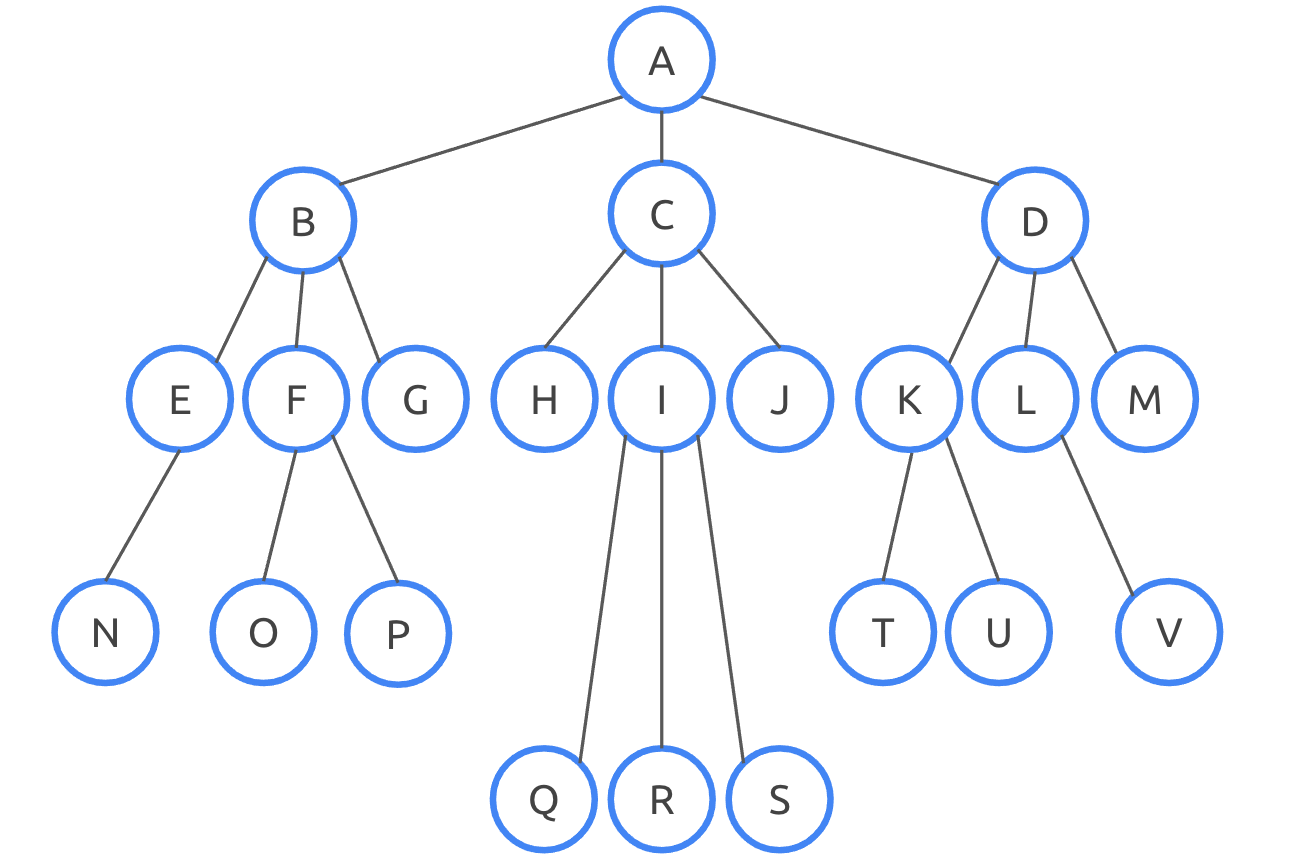

**a)** $LMDA$

**b)** $FPGA$

**c)** $BCAD$

**d)** $FPBG$

### Solution

The correct answers are **b)** and **d)**. **b)** treats the left subtree as the leftmost element, and the right subtree as everything else, and **d)** treats the right subtree as the rightmost element, and the left subtree as everything else.

**a)** That would appear in a post-order traversal.

**b)** Both breadth- and depth-first search have the same runtime complexity (though depending on your graph, one may complete more quickly than the other), namely $O(n)$ where $n$ is the total number of nodes.

**c)** While that is a form of a valid in-order traversal, it neglects the subtrees of $B$, $C$, and $D$.

**d)** There is no fundamental limit on the number of connections to other nodes that a node can store.

## Question 6

For in-order traversal, we first process the node's left subtree, then the node, and finally the node's right subtree. Our in-order traversal also continues recursively until the entire tree is processed.

Add a `get_nodes_inorder` method to the `Tree` class that returns a list of the elements that would be outputted in an in-order traversal. If any nodes have more than two children, treat `self.children[:n_children//2]` as the left subtree and `self.children[n_children//2:]` as the right subtree, where `n_children = len(self.children)`.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_inorder(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

Try setting up the recursion, first, and once you have the traversal working, tweaking the left and right subtrees until you get the expected output. We'll provide the frame for the recursion, again, but make sure you are splitting the `self.children` element consistently.

```python
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_inorder(self):
    node_list = []
    self._inorder_helper(self.root, node_list)
    return node_list

  def _inorder_helper(self, current_node, node_list):
    # Add your traversal and recursion code here.
```

Here's an additional hint for what the recursion should do.

```python
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_inorder(self):
    node_list = []
    self._inorder_helper(self.root, node_list)
    return node_list

  def _inorder_helper(self, current_node, node_list):
    # Go through the node's children up to len(current_node.children)//2, 
    # calling _inorder_helper on each one recursively.

    # Once those children have been processed, add the current node to 
    # node_list.

    # Finish up by going through the remaining children and calling 
    #_inorder_helper on each one.
    
    # Don't return node_list! It's passed by reference.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node(1))

root = tree.root

root.add_child(Node(2))
root.add_child(Node(3))
root.add_child(Node(4))

root.children[0].add_child(Node(5))
root.children[0].add_child(Node(6))

root.children[1].add_child(Node(7))

root.children[2].add_child(Node(8))
root.children[2].add_child(Node(9))
root.children[2].add_child(Node(10))

inorder_nodes = tree.get_nodes_inorder()
print([n.name for n in inorder_nodes])
# Should print: [5, 2, 6, 1, 3, 7, 8, 4, 9, 10]

### Solution

This is the trickiest of the traversals, as you have to make a decision about when to split your children and process the current node. For this problem, try to split as evenly as possible, but also experiment and see how changing that split will lead to different outputs!

Since we're making slices of the list, this isn't the most space-efficient solution; try to see if you can write a version of this solution that calculates the left and right children in-place without making a new list.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def get_nodes_inorder(self):
    node_list = []
    self._inorder_helper(self.root, node_list)
    return node_list

  def _inorder_helper(self, current_node, node_list):
    left_children = current_node.children[:len(current_node.children) // 2]
    for left_child in left_children:
      self._inorder_helper(left_child, node_list)

    node_list.append(current_node)

    right_children = current_node.children[len(current_node.children) // 2:]
    for right_child in right_children:
      self._inorder_helper(right_child, node_list)